# Introduction

**Part 1**

The purpose of this data mining project is to classify the edibility of fungi specimens according to their physical attributes with machine learning models trained on the dataset provided by The Audubon Society Field Guide to North American Mushrooms (1981)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Data exploration
Understanding, exploring and visualizing the agaricus-lepiota dataset's format, quantity, field identities, distributions

In [3]:
data = pd.read_csv("agaricus-lepiota.data", index_col=None, header=None)

# column names provided in dataset information file
columns = ['edibility', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 
           'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring','stalk-surface-below-ring', 
            'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 
           'spore-print-colors', 'population', 'habitat']
data.columns = columns

In [4]:
# move the class label edibility to the back
columns.append(columns[0])
columns.pop(0)

'edibility'

In [5]:
data = data[columns]
pd.options.display.max_columns = None
data.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-colors,population,habitat,edibility
0,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g,e


In [6]:
data.shape

(8124, 23)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap-shape                 8124 non-null   object
 1   cap-surface               8124 non-null   object
 2   cap-color                 8124 non-null   object
 3   bruises                   8124 non-null   object
 4   odor                      8124 non-null   object
 5   gill-attachment           8124 non-null   object
 6   gill-spacing              8124 non-null   object
 7   gill-size                 8124 non-null   object
 8   gill-color                8124 non-null   object
 9   stalk-shape               8124 non-null   object
 10  stalk-root                8124 non-null   object
 11  stalk-surface-above-ring  8124 non-null   object
 12  stalk-surface-below-ring  8124 non-null   object
 13  stalk-color-above-ring    8124 non-null   object
 14  stalk-color-below-ring  

In [8]:
data.isnull().any()

cap-shape                   False
cap-surface                 False
cap-color                   False
bruises                     False
odor                        False
gill-attachment             False
gill-spacing                False
gill-size                   False
gill-color                  False
stalk-shape                 False
stalk-root                  False
stalk-surface-above-ring    False
stalk-surface-below-ring    False
stalk-color-above-ring      False
stalk-color-below-ring      False
veil-type                   False
veil-color                  False
ring-number                 False
ring-type                   False
spore-print-colors          False
population                  False
habitat                     False
edibility                   False
dtype: bool

In [9]:
data.isna().any()

cap-shape                   False
cap-surface                 False
cap-color                   False
bruises                     False
odor                        False
gill-attachment             False
gill-spacing                False
gill-size                   False
gill-color                  False
stalk-shape                 False
stalk-root                  False
stalk-surface-above-ring    False
stalk-surface-below-ring    False
stalk-color-above-ring      False
stalk-color-below-ring      False
veil-type                   False
veil-color                  False
ring-number                 False
ring-type                   False
spore-print-colors          False
population                  False
habitat                     False
edibility                   False
dtype: bool

In [10]:
data['stalk-root'].value_counts()

b    3776
?    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64

All the features in the dataset are categorical symbols that represent physical characteristics of different parts of the fungi specimen such as size, shape, colour, appearance. 

As stated in the NAMES file, the stalk-root column has 2480 missing values denoted by '?'. 

The class label **edibility** is a binary label with 'p' representing poisonous and 'e' representing edible.According to the website documentation, the distribution of edibility out of 8124 record is:

* edible: 4208 (51.8%)

* poisonous: 3916 (48.2%)

## Exploring the distributions of categorical variables
Using countplots to visualise the distribution value in each feature, and the distribution of the edibility within each feature to asses how much variance in edibility each feature accounts for.

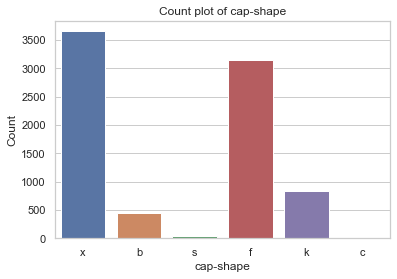

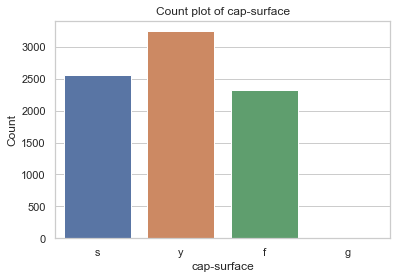

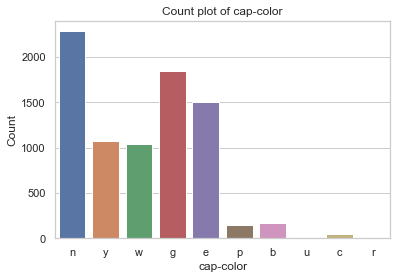

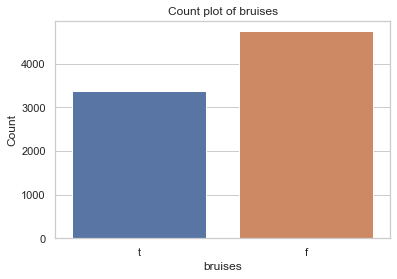

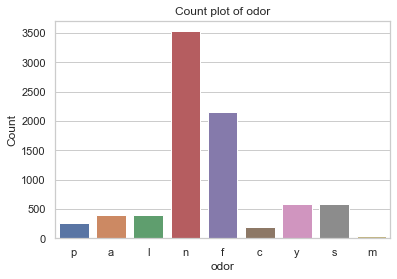

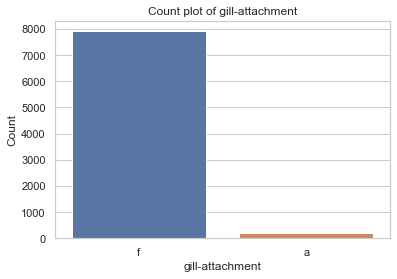

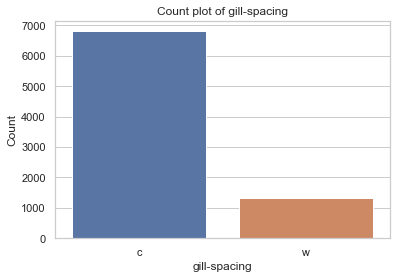

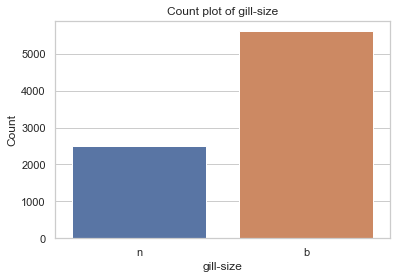

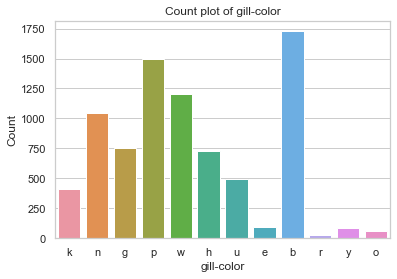

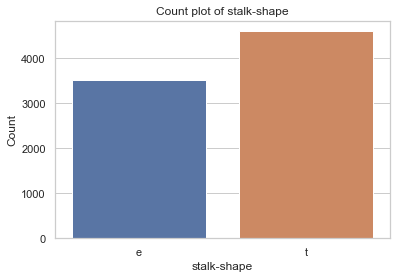

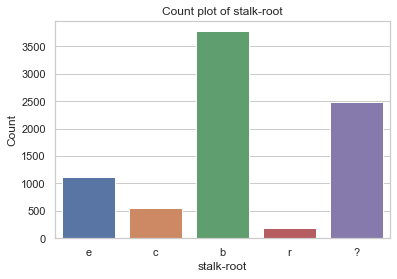

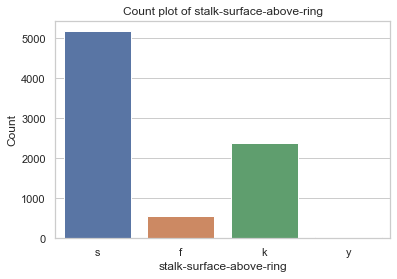

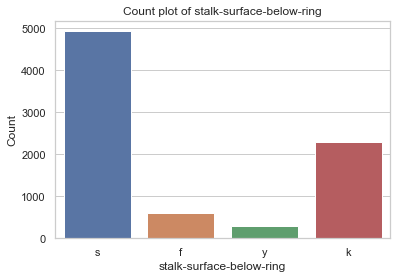

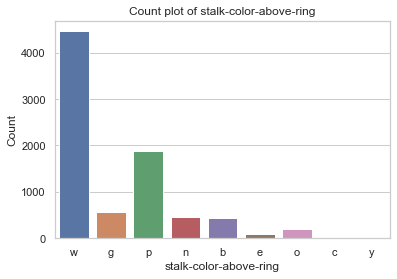

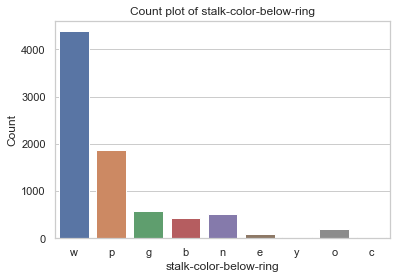

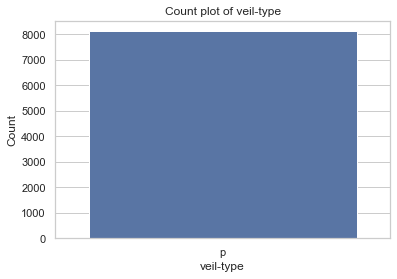

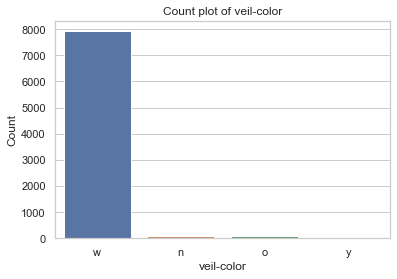

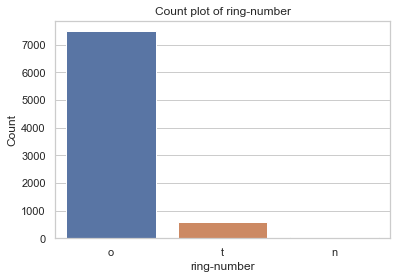

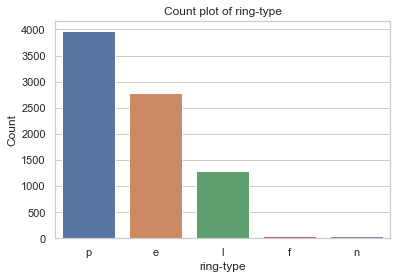

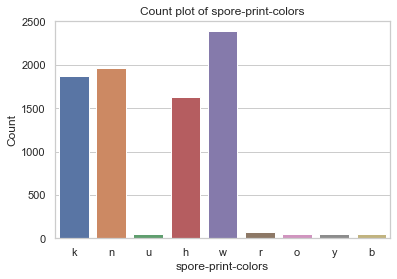

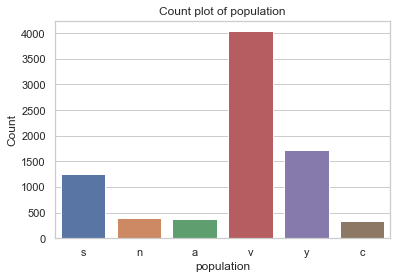

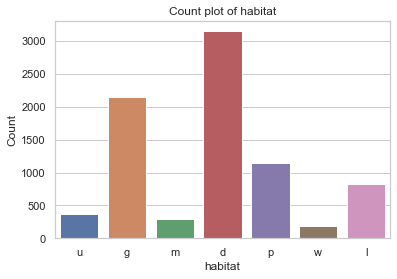

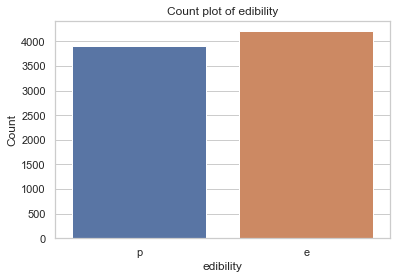

In [11]:
sns.set_style('whitegrid')
for col in columns:
    plt.figure()
    cp = sns.countplot(x=col, data=data)
    cp.set_title(f'Count plot of {col}');
    cp.set_ylabel("Count")
    plt.show()

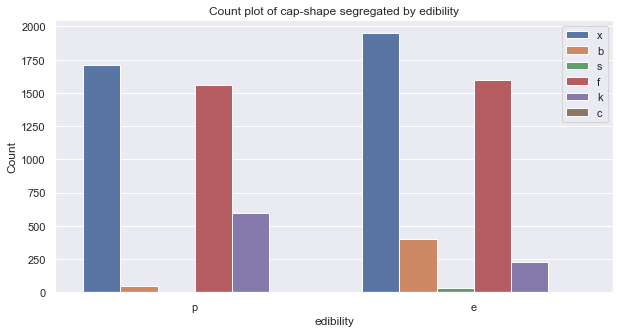

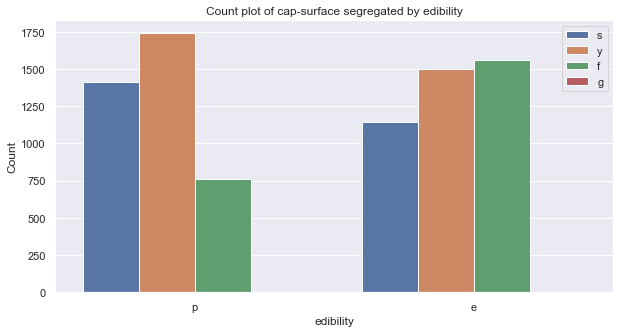

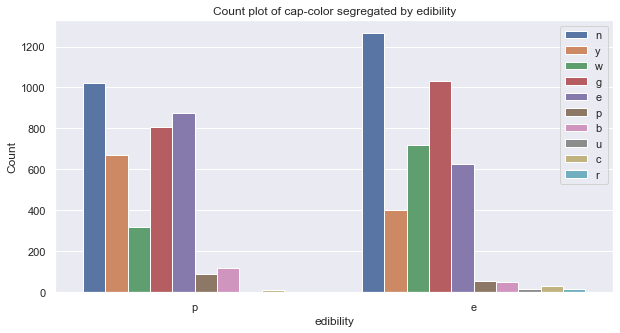

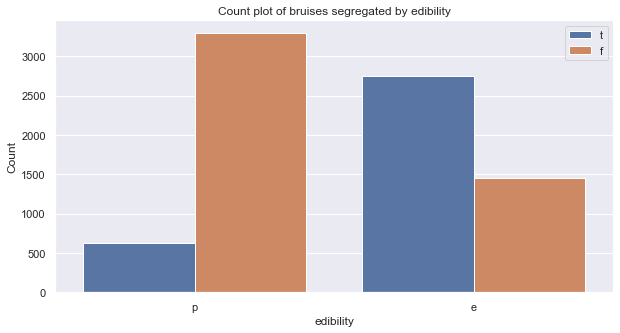

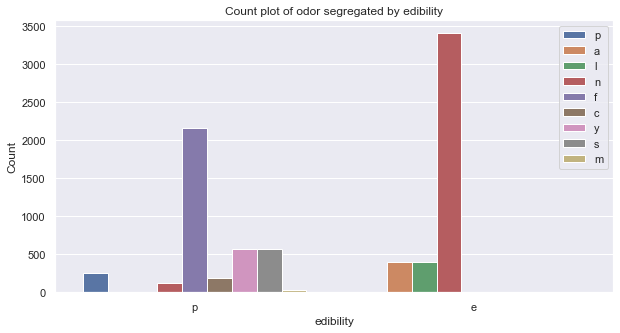

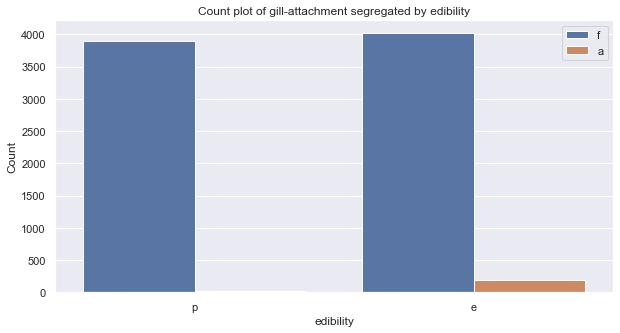

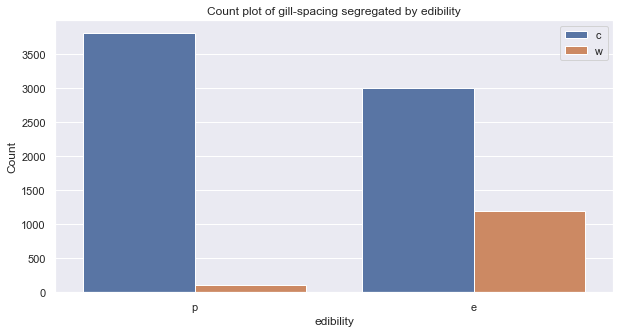

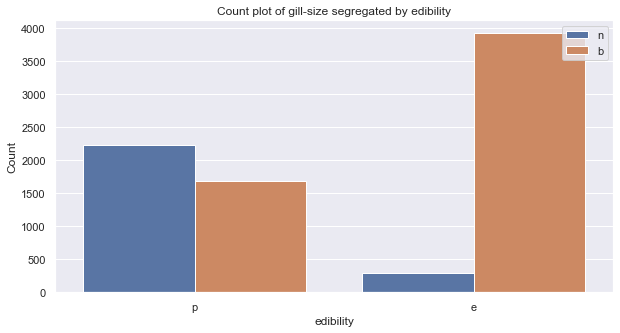

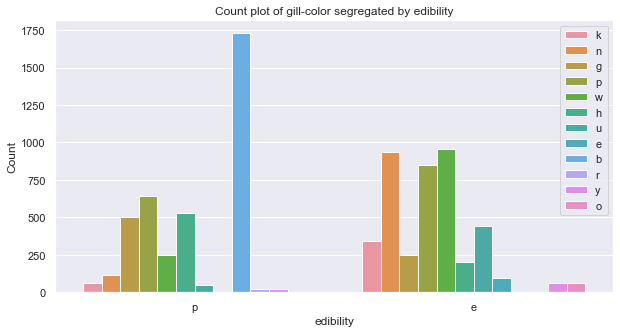

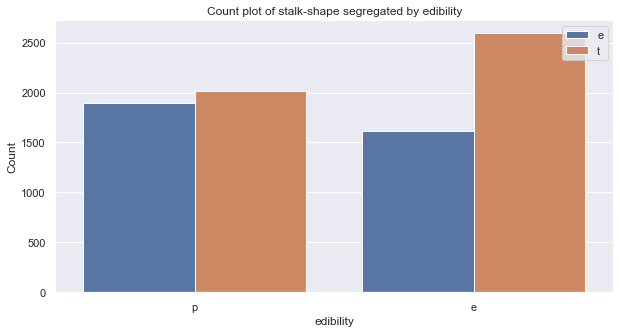

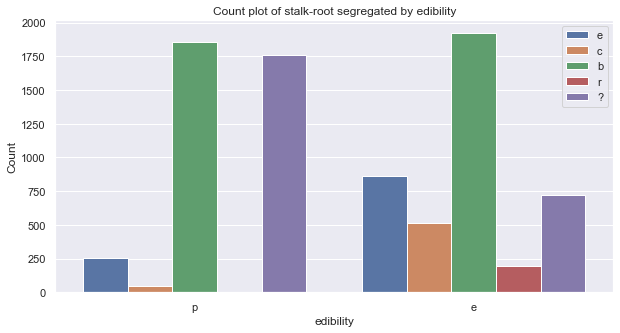

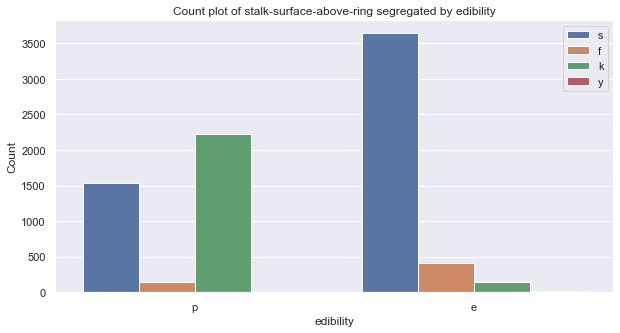

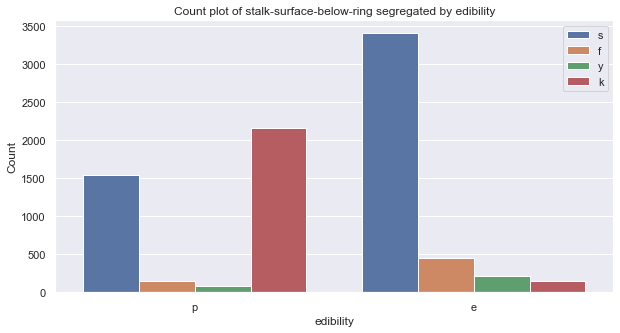

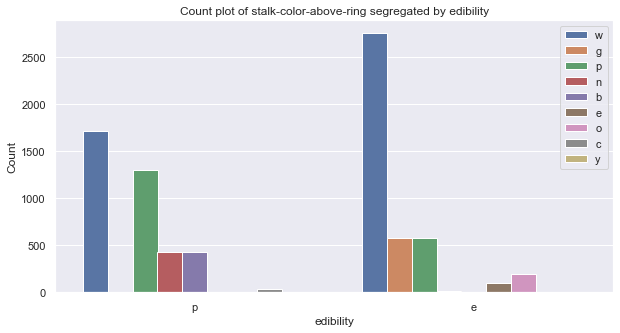

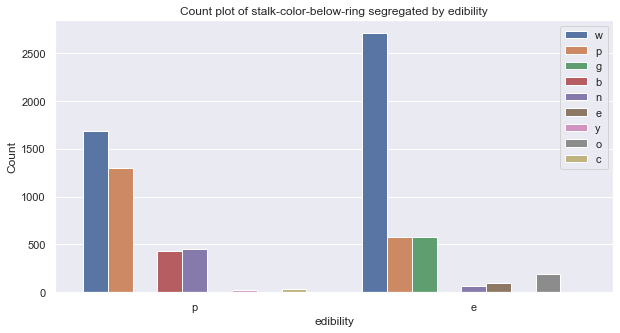

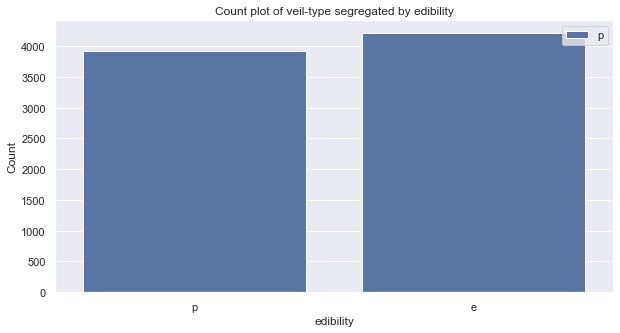

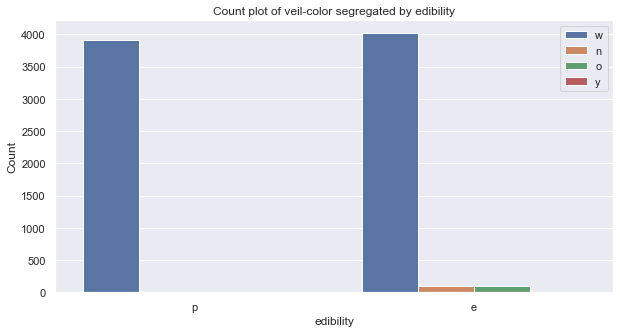

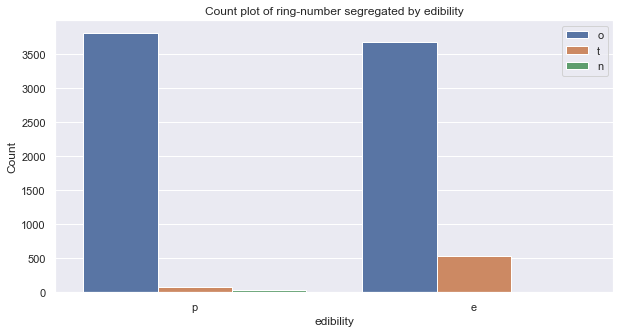

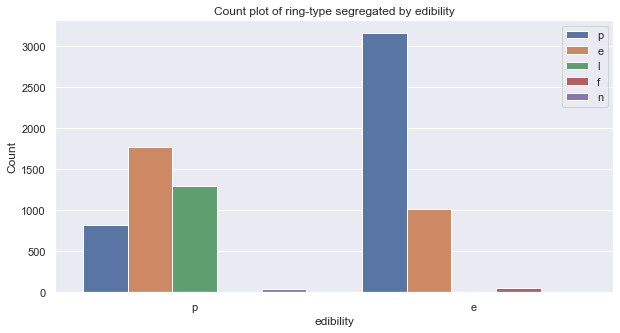

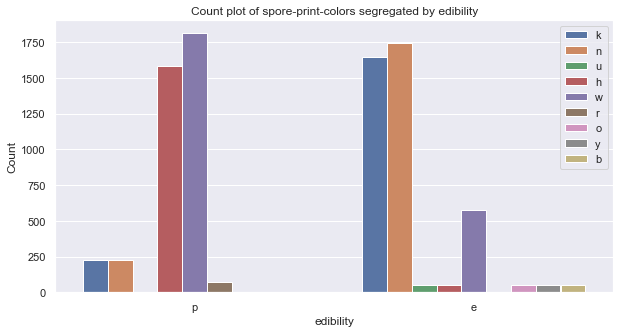

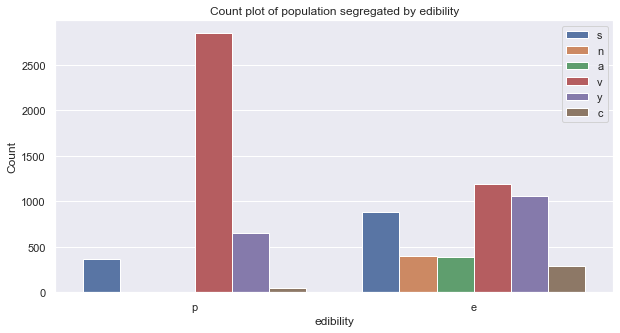

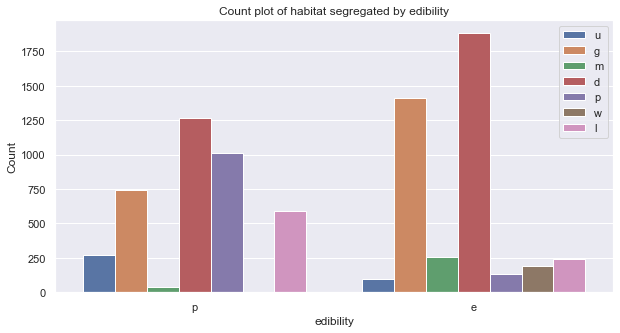

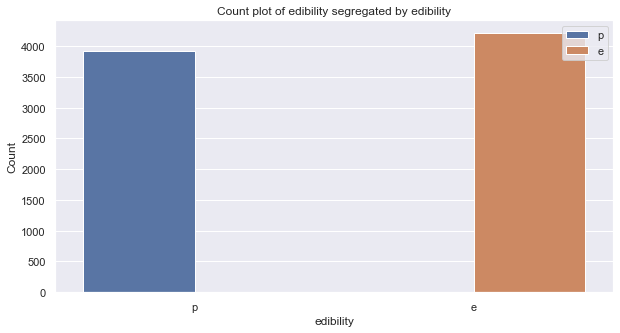

In [12]:
sns.set_theme(context='notebook', style='darkgrid')
for col in columns:
    plt.figure(figsize=(10, 5))
    cp = sns.countplot(x="edibility", hue=col, data=data)
    cp.set_ylabel("Count")
    cp.set_title(f'Count plot of {col} segregated by edibility');
    cp.legend(loc='upper right')
    plt.show()

## Feature analysis and selection
The values of the veil-type attribute in the dataset are entirely the same. The large majority of the values in the veil-colour column share the same value of 'w' while a minute amount of the data has values other than 'w'.

In the stalk-root feature, there are about 2500 records with missing values.

Features that constitute a small amount of the variance in the edibility attribute due to the similar distributions:
* cap-shape 
* gill-attachment 
* veil-color 
* ring-number

To increase the performance of the classification model, features that account for little or none of the variance in the class label should be removed to prevent erroneous reliance on undistinguishing features to make classificaitons, and improve computational performance. **veil-type will be remove entirely. The latter 4 features will be removed in different combinations for comparison between classification models with and without them to obtain the most accurate model**.